# 自相关性

相关性一般是指两个变量之间是否具有某种关联，自相关性则指一个时间序列的两个不同时间点的变量是否相关联。时间序列具有自相关性是我们能够进行分析的前提，若时间序列的自相关性为0，也就是说各个时点的变量不相互关联，那么未来与现在和过去就没有联系，也就是说，根据过去推测未来毫无根据和意义。

时间序列的自相关性一般用时间序列的自协方差函数（Autocovariance Function，AF）、自相关系数函数（Autocorrelation Coefficient Function, ACF）和偏自相关系数函数（Partial Autocorrelation Coefficient Function, PACF）等统计量来体现。序列的自相关性常常用来解释经济金融系统中经济行为在时间上的惯性，比如经济高涨时期，较高的经济增长率会持续一段时间，而在经济衰退期，较高的失业率也会持续一段时间；也可以用来解释经济活动的滞后效应，比如人们消费或者投资行为会受到习惯的影响，并不会由于收入增加或减少而立刻调整，而是呈现一定程度的自我相关。

## 自协方差函数

自协方差（Autocovariance,简称AF）是时间序列与其滞后项的协方差，假设X为随机变量（即随着时间变化取值随机的变量,比如股票价格），则k阶自协方差使用数学公式表示为：
$$AF_k=E[(X_t-\mu_t)(X_{t-k}-\mu_{t-k})]=Cov(X_t,X_{t-k}),k=0,1,2,...$$
其中，E表示求数学期望，$\mu$是随机变量X的均值，当k=0时，可得$AF_0=E[(X_t-\mu_t)^2]$,即为随机变量X的方差。

## 自相关函数
自协方差跟变量的单位有很大关系，比如X放大10倍，则自协方差将放大100倍，因此其值大小并不能反映相关性的大小。为了消除量纲（单位）的影响，使用自相关系数来刻画变量与其滞后项的相关性。自相关系数（Autocorrelation Coefficient，简称ACF）本质是相关系数，等于自协方差除以方差，k阶自相关系数数可以表示为：
$$ACF_k=\frac{Cov(X_t,X_{t-k})}{Var(X_t)}$$
上过高中数学的都知道协方差和相关系数的含义，从统计上描述两个不同变量的相互影响关系（非因果），那么自协方差和自相关系数则是刻画同一个变量在不同时期取值的相关程度，比如描述上证综指过去价格对今天价格的影响。

## 偏自相关函数

假设对于上证综指价格序列（$P_t,P_{t-1},P_{t-2},...$）,一阶自相关系数大于0，说明今天的价格$P_t$与昨天的价格$P_{t-1}$相关，而昨天价格$P_{t-1}$又与前一日价格相关$P_{t-2}$，依次类推，可见当你计算$P_{t}$与$P_{t-1}$之间的自相关系数时，同时包含了更早之前所有各期的信息对今天的间接影响，度量的是过去所有信息加总的影响效果。为了剔除其他各期的影响，单纯考察过去某一单期对今天的影响，引入偏自相关函数（Partial Autocorrelation Coefficient，简称PACF），即条件自相关系数，使用数学公式表示为：
$$PACF_k=Corr(X_t,X_{t-k}|X_{t-1},X_{t-2},...,X_{t-k+1})$$

偏自相关函数可以通过自回归模型（后续关于时间序列建模会进一步分析）来表述和求解，用$Φ_{kj}$表示k阶自回归式中第j个回归系数，则k阶自回归模型表示为
$$X_t=Φ_{k1}X_{t-1}+Φ_{k2}X_{t-2}+...+Φ_{kk}X_{t-k}+\mu_t$$
其中$Φ_{kk}$是最后一个系数。若把$Φ_{kk}$看作滞后期k的函数，则称$Φ_{kk}$，k = 1,2... 为偏自相关函数。

自相关系数和偏自相关系数越大，说明过去对现在的影响越大。

## Python计算自相关和偏自相关系数

Python的pandas库提供了计算基本统计量的函数，包括均值df.mean(),协方差df.cov(),相关系数df.corr(),方差df.var()（或标准差df.std()）等,其中df为数据列表；而自相关系数和偏自相关系数的计算则要用到statsmodels库（acf()和pacf()）。statsmodels这是一个很强大的统计数理模型库，在后面的时间序列分析与建模会进一步介绍相关函数及其运用。

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [121]:
#获取数据，从tushare上获取沪深300指数为例
import tushare as ts
token='e0eeb08befd1f07516df2cbf9cbd58663f77fd72f92a04f290291c9d'
pro=ts.pro_api(token)

def get_data(code,n=250):
    df=pro.index_daily(ts_code=code)
    #将日期设置为索引
    df.index=pd.to_datetime(df.trade_date)
    #最近n日价格走势
    df=df.sort_index()[-n:]
    #只保留收盘价数据
    del df.index.name
    return df.close
df=get_data('000300.SH')

In [122]:
df.head()

2018-08-01    3447.3882
2018-08-02    3370.9579
2018-08-03    3315.2839
2018-08-06    3273.2728
2018-08-07    3368.8695
Name: close, dtype: float64

### 计算自相关和偏自相关系数

In [123]:
import statsmodels.tsa.api as smt
#tsa是Time Series analysis缩写
#tsa的stattools（统计工具）提供了计算acf和pacf以及后面要用到的adfuller单位根检验函数
#使用help(smt.stattools.acf)可以查看相关参数设置
#计算自相关系数，这里设置滞后项为5期,默认是40期滞后
acf=smt.stattools.acf(df,nlags=5)
#计算偏自相关系数
pacf=smt.stattools.pacf(df,nlags=5)
print(f'自相关系数为：{acf};\n偏自相关系数为：{pacf}')

自相关系数为：[1.         0.98495933 0.97065693 0.957792   0.94108442 0.92629851];
偏自相关系数为：[ 1.          0.98891499  0.02412783  0.05779393 -0.18202767  0.07504892]


### 自相关系数和偏自相关系数

In [124]:
def acf_pacf_plot(data, lags=None):
    #判断是否为pandas的Series格式数据
    if not isinstance(data, pd.Series):   
        data = pd.Series(data)
    #设定画面风格，这里设置为'bmh', colspan=2
    with plt.style.context('bmh'):    
        fig = plt.figure(figsize=(10, 8))
        #设置子图
        layout = (3,1)
        ts_ax = plt.subplot2grid(layout, (0, 0))
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (2, 0))
        data.plot(ax=ts_ax)
        ts_ax.set_title('时间序列图')
        smt.graphics.plot_acf(data, lags=lags, ax=acf_ax, alpha=0.5)
        acf_ax.set_title('自相关系数')
        smt.graphics.plot_pacf(data, lags=lags, ax=pacf_ax, alpha=0.5)
        pacf_ax.set_title('偏自相关系数')
        plt.tight_layout()
    return

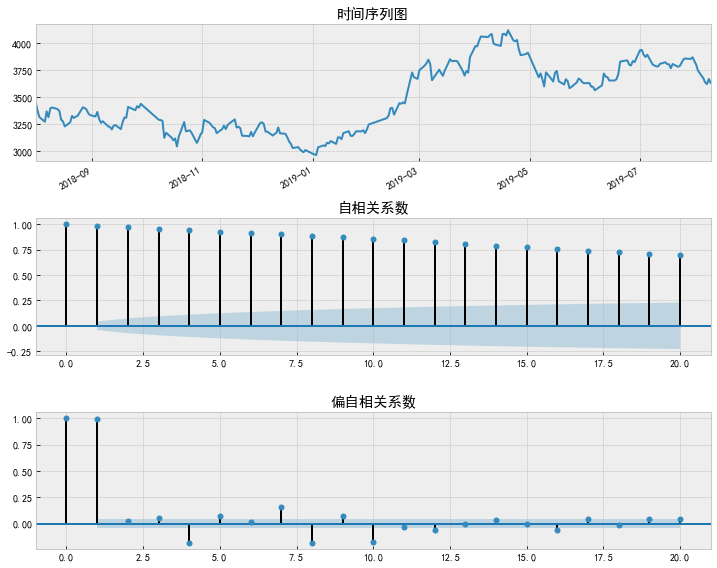

In [125]:
#设置20阶滞后期
acf_pacf_plot(df,lags=20)

# 平稳性

时间序列分析的主要目的是利用事物特征变量的历史和现状来推测未来可能出现的状况，即假设时间序列的基本特性必须能从过去维持到我们推测的时期，否则，基于历史和现状来预测未来将变得不可靠。时间序列的平稳性，简单理解是时间序列的基本特性维持不变，换句话说，所谓平稳性就是要求由样本时间序列所得到的曲线在未来的一段时期内仍能沿着现有的形态持续下去。金融领域很多变量之所以难以估计，是因为这些变量经常发生突变，不是平稳的时间序列。

时间序列的平稳性是经典时间序列分析的基本假设前提，只有基于平稳的时间序列进行的预测才是有效的。

平稳性有强平稳和若平稳之分，一般所说的平稳时间序列指的是若平稳时间序列。

## 强平稳（Strictly Stationary）
对于任意整数$\tau$，联合分布$F_X(X_{t_1},..,X_{t_n})与F_X(X_{t_1+\tau},...,X_{t_n+\tau})$均相同，则时间序列${X_t}$是强平稳的。强平稳是一个很强的条件，要求该时间序列的任何统计性质都不会随着时间发生变化。强平稳由于条件苛刻，理论和实证上都难以检验，因此现实中几乎无法运用。

## 弱平稳（Weakly Stationary）
弱平稳放宽了平稳性条件，只要求低阶矩平稳，即数学期望（均值）和方差不随时间和位置变化。
弱平稳过程的条件是：（1）均值函数在所有时间上恒为常数；（2）存在二阶矩；（3）对于所有时间t和和时滞k，自协方差相同。

值得注意的是，强平稳和弱平稳时间序列二者并没有包含关系。换句话说，强平稳时间序列不一定是弱平稳的，因为强平稳过程不一定存在二阶距（即$E(X_t^2)$可能无穷大）；弱平稳时间序列也不一定是强平稳过程，因为弱平稳只能保证一阶矩和二阶距不随时间变化，但不能保证其有穷维分布不随时间变化。弱平稳的正态分布时间序列必定是强平稳的。因为正态分布的概率密度是由均值函数和自相关函数完全确定的，即如果均值函数和自相关函数不随时间变化，则概率密度函数也不随时间变化。

如何判断时间序列的平稳性

- 观察时间序列图的形状来初步判断其平稳性
 根据弱平稳的定义，时间序列的均值和方差为常数，因此其时序图应该围绕某一水平线上下以大致相同的幅度波动。如果该时序图存在明显递增、递减或周期性波动，则该时间序列很可能是不平稳的。
 
 
- 观察序列的自相关和偏自相关函数图
对于平稳时间序列而言，其自相关或偏自相关系数一般会快速减小至0附件或者在某一阶后变为0，而非平稳的时间序列的自相关系数一般是缓慢下降而不是快速减小。


- 单位根检验
通过观察时序图、自相关和偏自相关图来判断时间序列平稳性，可能出现因观察者对图形的判断不同而得出不同的结论，为了更加客观的考察时间序列的平稳性，引入统计检验方法，即单位根检验。常见的单位根检验方法有DF检验（Dickey-Fuller Test）、ADF检验（AuGMENTED Dickey-Fuller Test）和PP检验（Phillips-Perron Test）。本文重点是介绍Python在时间序列的应用，因此关于单位根检验和DF、ADF、PP检验的公式原理此处不详细展开，可参考本科计量经济学教材的时间序列分析部分。Python的statsmodels库中的tsa（时间序列）工具包（stattools）提供了这些相关检验函数，后面再进一步展开分析。

# 白噪声和随机游走

## 基本概念
白噪声过程也叫纯随机序列，是指随机过程在任意时点t的变量$X_t$的均值和协方差均为0，而方差为一常数，即满足下面的数学条件：
$$均值：E(X_t)=0, 方差：Var(X_t)=\sigma^2,协方差：ACF_k=0,k>0$$
白噪声序列的均值和方差为常数，间隔大于0的自协方差都恒等于0，因此是平稳的时间序列。如果白噪声过程中各变量独立并且都服从正态分布，则该序列为高斯白噪声过程（Gussian White Noise）。高斯白噪声序列是强平稳的时间序列，并且各期之间不仅不相关还相互独立。

如果一个时间序列满足高斯白噪音过程，则无法根据过去信息来预测未来。

比如非平稳时间序列：$$x_t=x_{t-1}+\varepsilon_t，其中，x_0=0，\varepsilon_t \sim N(0, \sigma_\epsilon^2)$$
这里的随机扰动项${\varepsilon_t}$是服从正态分布的纯随机序列，$x_t可以改写成x_t=\sum_{i=1}^t\varepsilon_i$,即为纯随机变量的加总，所以被成为随机游走过程（Random Walk）。

根据有效市场假说原理，股票价格是随机游走的，因此是无法被预测的。

## 白噪声检验（Ljung-Box检验）

如果一个时间序列是纯随机游走的，意味着它的每一次新的变化都无迹可寻，无法从中捕捉对预测有用的信息。换句话说，纯随机时间序列是没有分析和预测的价值的。那么如何检验和判断一个时间序列是否为纯随机序列呢？一般可用Ljung-Box检验方法（简称LB检验）进行统计检验，检验的统计量为Q统计量：  
$$Q(m)=n(n+2)\sum_{k=1}^m\frac{\rho_k^2}{n-k}\sim X_m^2$$

其中，$\rho_k^2$是序列的k阶自相关系数，n是整个序列中的观测值个数，m是滞后阶数。当序列存在自相关时，其自相关系数较大，对应的$Q(m)$也较大，相反，当序列为随机序列、无自相关时，序列的自相关系数不会显著地异于0，则$Q(m)$会很小。检验一个时间序列在m阶内是否为白噪声，只有当$Q(1),Q(2),...,Q(m)$m个Q统计量均小于对应的$X^2$分布的临界值时，才能说明该序列在所检验的m阶内是纯随机的。在实际应用中，LB检验的原假设为所检验序列是纯随机序列，当LB检验统计量对应的p值大于所设定的显著性水平（如5%，1%，0.5%等）时，接受原假设，认为所检验序列为白噪声序列，反之拒绝原假设，认为序列是非白噪声序列。

# Python模拟白噪音和平稳性检验

In [132]:
#引入statsmodels和scipy.stats用于画QQ和PP图
import scipy.stats as scs
import statsmodels.api as sm
def ts_plot(data, lags=None):
    if not isinstance(data, pd.Series):   
        data = pd.Series(data)
    with plt.style.context('bmh'):    
        fig = plt.figure(figsize=(10, 8))
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))

        data.plot(ax=ts_ax)
        ts_ax.set_title('时间序列图')
        smt.graphics.plot_acf(data, lags=lags, ax=acf_ax, alpha=0.5)
        acf_ax.set_title('自相关系数')
        smt.graphics.plot_pacf(data, lags=lags, ax=pacf_ax, alpha=0.5)
        pacf_ax.set_title('偏自相关系数')
        sm.qqplot(data, line='s', ax=qq_ax)
        qq_ax.set_title('QQ 图')        
        scs.probplot(data, sparams=(data.mean(), data.std()), plot=pp_ax)
        pp_ax.set_title('PP 图') 
        plt.tight_layout()
    return
#Q-Q图的结果与P-P图非常相似，只是P-P图是用分布的累计比，而Q-Q图用的是分布的分位数来做检验
#和P-P图一样，如果数据为正态分布，则在Q-Q正态分布图中，数据点应基本在图中对角线上

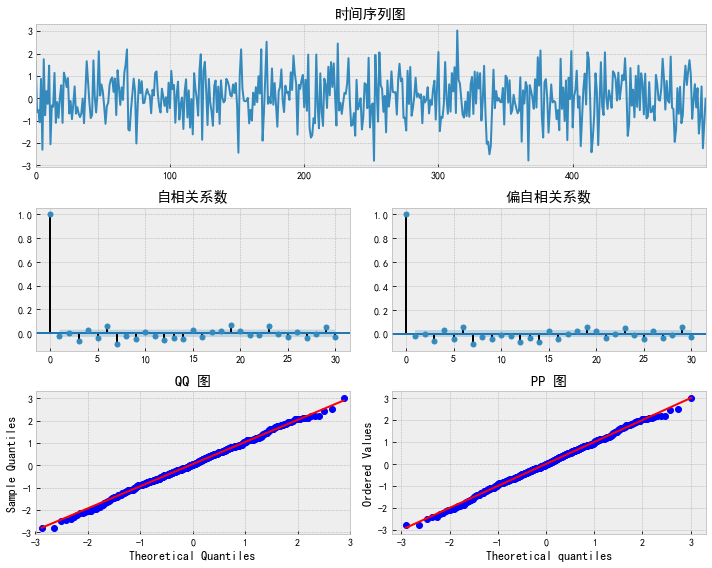

In [136]:
#使用numpy简单模拟白噪声过程
np.random.seed(1)
# plot of discrete white noise
randser = np.random.normal(size=500)
ts_plot(randser, lags=30)

可以看到过程是随机且在0附近波动。ACF和PACF显示没有明显的序列相关。要记住，由于是正态分布采样的结果，我们应该在自相关图中看到大约5％的显著性。最下面，QQ图和概率图是比较数据的概率分布和其他理论的分布。在这里，理论分布是标准正态分布，因此我们的数据是正态分布，符合高斯白噪声。 随机游走：随机游走是时间序列 𝑥𝑡  的模型： 𝑥𝑡=𝑥𝑡−1+𝑤𝑡，𝑤𝑡 是离散的白噪声序列。 随机游走是不平稳的，因为协方差是和时间相关的。如果我们建模的时间序列是随机游走的，那么它是不可预测的。

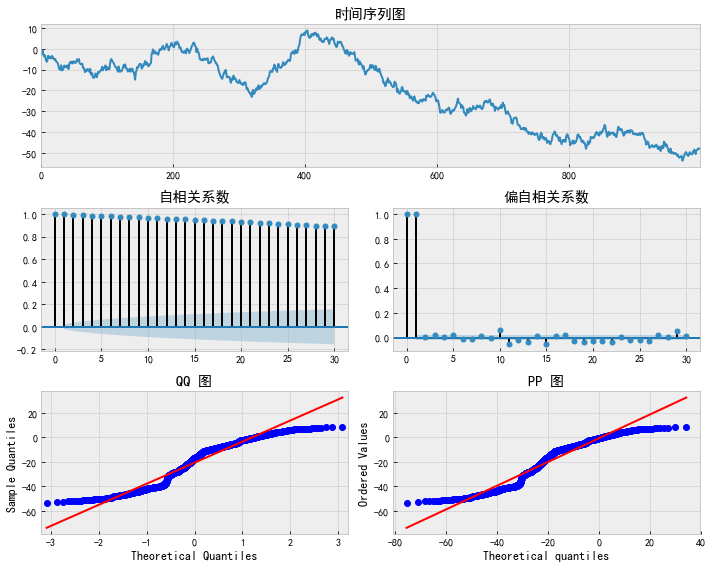

In [137]:
#从标准正态分布采样模拟一个随机游走
np.random.seed(2)
n_samples = 1000
x = w = np.random.normal(size=n_samples)
for t in range(1,n_samples):   #应该从1开始，但影响不大，x[-1]也有值
    x[t] = x[t-1] + w[t]
ts_plot(x, lags=30)

明显看出序列是不平稳的。让我们看看随机游走对我们的模拟数据是否很好的拟合。回忆随机游走模型是 𝑥𝑡=𝑥𝑡−1+𝑤𝑡。移项可以得到𝑥𝑡−𝑥𝑡−1=𝑤𝑡 。因此，随机游走的一阶差分应该等于白噪声。我们可以对时间序列使用 np.diff() 函数看它是否成立。

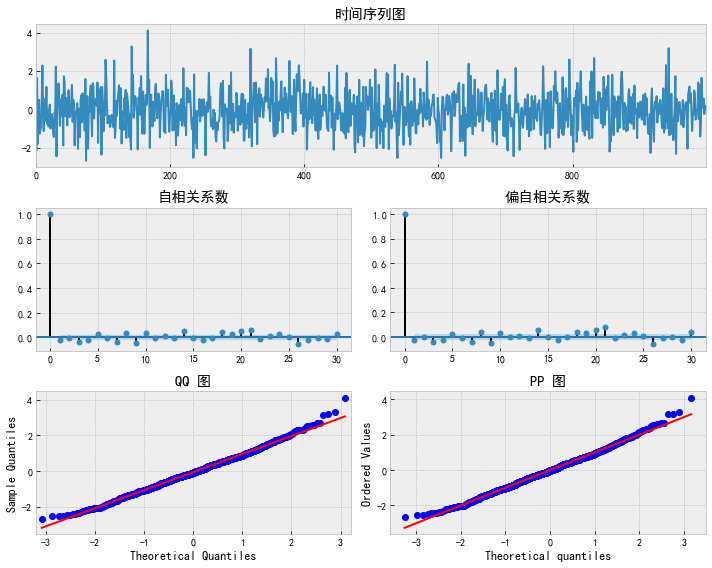

In [139]:
# First difference of simulated Random Walk series
ts_plot(np.diff(x), lags=30)

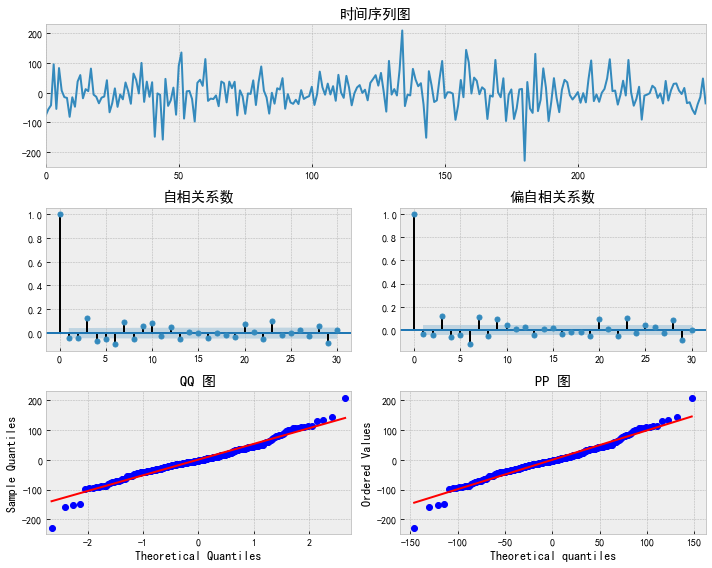

In [141]:
#确实是白噪声过程！假如我们用随机游走拟合沪深300价格的一阶差分会如何？
ts_plot(np.diff(df),lags=30)

非常像白噪声！但是看QQ图和概率图。这个过程很像标准正态分布但是有厚尾。在ACF和PACF图上有一些重要的序列相关性，在2，4？6？,..,lags。这意味着应该有更好的模型去描述真实的价格变化过程。

参考文献：
[Time Series Analysis (TSA) in Python - Linear Models to GARCH](http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016#WNandRW=)

《量化投资以Python为工具》